# D26C - Decision Tree

In [40]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [41]:
math.sqrt(100)
#https://docs.python.org/3/library/math.html

10.0

In [42]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [43]:
#Options
pd.set_option('display.max_columns', 500, 'display.width', 1000)

In [48]:
#values represented by 2 coordinates x, y
m = ['Mandakini', 23, 200, 'HR', 'F', 'Yes']  # age, salary in 1000, gender, left or not
c = ['Catherine', 23, 154, 'IT', 'F', 'No']
a = ['Akshay', 25, 360, 'FIN', 'M', 'Yes']
k = ['Amit', 24, 470, 'IT','M', 'Yes']
s = ['Shantini', 35, 500, 'HR', 'F','No']
rownames = ['m','c','a','k','s']
colnames = ['name', 'age','salary', 'dept', 'gender', 'attrition']
#form 2 groups by closeness
print(m, c, a, k,s)

['Mandakini', 23, 200, 'HR', 'F', 'Yes'] ['Catherine', 23, 154, 'IT', 'F', 'No'] ['Akshay', 25, 360, 'FIN', 'M', 'Yes'] ['Amit', 24, 470, 'IT', 'M', 'Yes'] ['Shantini', 35, 500, 'HR', 'F', 'No']


In [49]:
data = [m,c,a, k,s]
df = pd.DataFrame(data, columns=colnames, index=rownames)
df

,name,age,salary,dept,gender,attrition
m,Mandakini,23,200,HR,F,Yes
c,Catherine,23,154,IT,F,No
a,Akshay,25,360,FIN,M,Yes
k,Amit,24,470,IT,M,Yes
s,Shantini,35,500,HR,F,No


In [50]:
from sklearn.preprocessing import LabelEncoder
#ordEncoder = OrdinalEncoder()
label_encoder = LabelEncoder()

In [51]:
cat_cols =['dept', 'gender', 'attrition']
print(df[cat_cols].head())

  dept gender attrition
m   HR      F       Yes
c   IT      F        No
a  FIN      M       Yes
k   IT      M       Yes
s   HR      F        No


In [52]:
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df

,name,age,salary,dept,gender,attrition
m,Mandakini,23,200,1,0,1
c,Catherine,23,154,2,0,0
a,Akshay,25,360,0,1,1
k,Amit,24,470,2,1,1
s,Shantini,35,500,1,0,0


-  Gender : F-0, M-1 ; 
-  Attition : Yes-1, No-0

In [53]:
df

,name,age,salary,dept,gender,attrition
m,Mandakini,23,200,1,0,1
c,Catherine,23,154,2,0,0
a,Akshay,25,360,0,1,1
k,Amit,24,470,2,1,1
s,Shantini,35,500,1,0,0


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
X = df.drop(columns =['name','attrition'])  #IV
y = df.attrition  #IV
print(X, '\n', y)

   age  salary  dept  gender
m   23     200     1       0
c   23     154     2       0
a   25     360     0       1
k   24     470     2       1
s   35     500     1       0 
 m    1
c    0
a    1
k    1
s    0
Name: attrition, dtype: int32


In [56]:
clsModel = DecisionTreeClassifier(max_depth=3, random_state=123).fit(X, y)  #model with parameter
clsModel.classes_

array([0, 1])

In [57]:
y_pred = clsModel.predict(X)
y_pred

array([1, 0, 1, 1, 0])

In [58]:
pd.concat([y.reset_index(drop=True), pd.Series(y_pred, name='Predicted').reset_index(drop=True)], axis=1)

,attrition,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
clsReport = classification_report(y_true=np.array(y), y_pred= y_pred)
print('Classification Report ', clsReport)

Classification Report                precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [61]:
cm = confusion_matrix(y_true=y, y_pred=y_pred)
print('Confusion Matrix ', cm)

Confusion Matrix  [[2 0]
 [0 3]]


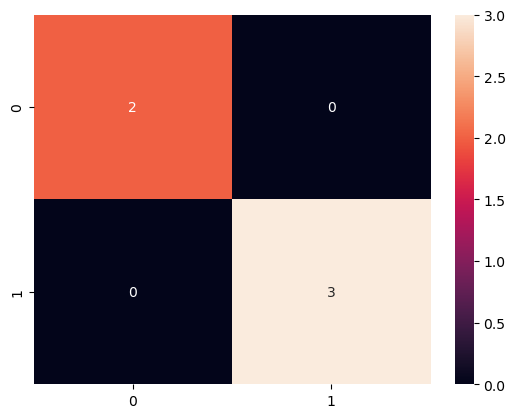

In [62]:
sns.heatmap(cm, annot=True)
plt.show()

In [63]:
accScore = accuracy_score(y_true=y, y_pred=y_pred)
print('Accuracy Score ', accScore) #1.0 100%

Accuracy Score  1.0


In [64]:
from sklearn.tree import plot_tree

In [68]:
X.head()

,age,salary,dept,gender
m,23,200,1,0
c,23,154,2,0
a,25,360,0,1
k,24,470,2,1
s,35,500,1,0


In [73]:
X.loc[:,'gender']

m    0
c    0
a    1
k    1
s    0
Name: gender, dtype: int32

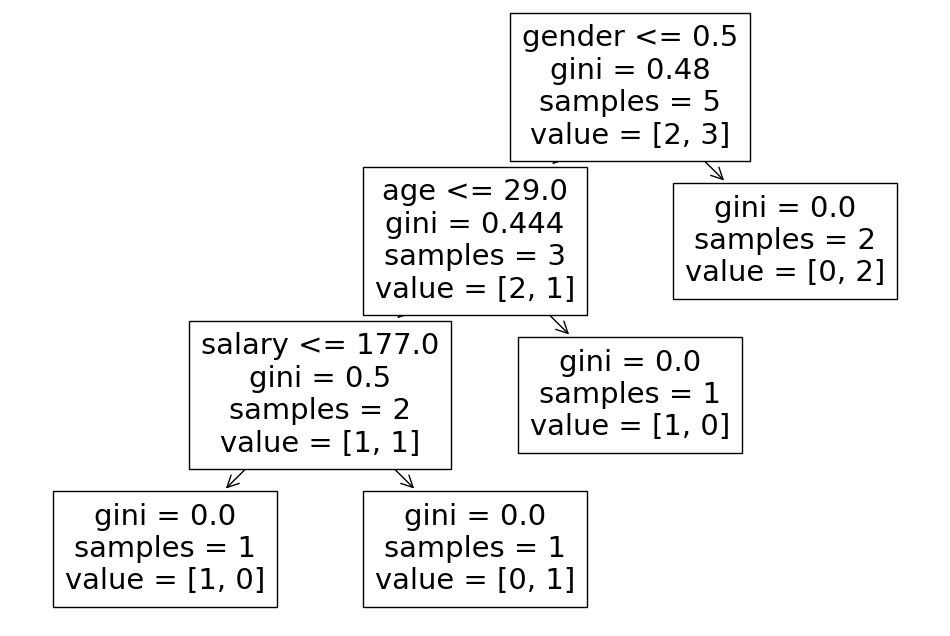

In [77]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree=clsModel, feature_names=X.columns)
plt.show();

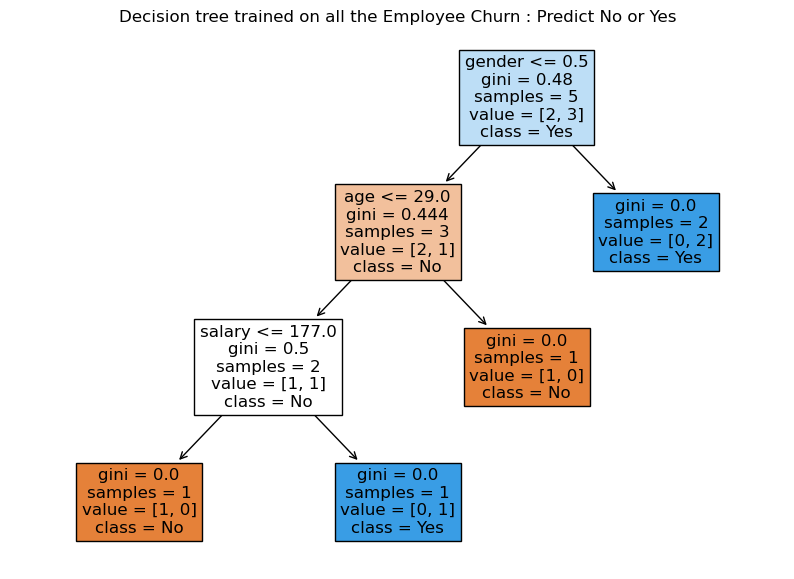

In [78]:
plt.figure(figsize=(10,7))
plot_tree(clsModel, filled=True, feature_names=['age','salary', 'dept', 'gender'], class_names=['No','Yes'], fontsize=12, max_depth=3)
plt.title("Decision tree trained on all the Employee Churn : Predict No or Yes")
plt.show();

In [79]:
df

,name,age,salary,dept,gender,attrition
m,Mandakini,23,200,1,0,1
c,Catherine,23,154,2,0,0
a,Akshay,25,360,0,1,1
k,Amit,24,470,2,1,1
s,Shantini,35,500,1,0,0


In [90]:
newData1 = pd.DataFrame({'age':[26, 25],  'salary':[180, 200],  'dept':[0,2], 'gender':[0,1]})
newData1

,age,salary,dept,gender
0,26,180,0,0
1,25,200,2,1


In [91]:
clsModel.predict(newData1)
#predict Salary of these persons(they will leave)

array([1, 1])

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
df

,name,age,salary,dept,gender,attrition
m,Mandakini,23,200,1,0,1
c,Catherine,23,154,2,0,0
a,Akshay,25,360,0,1,1
k,Amit,24,470,2,1,1
s,Shantini,35,500,1,0,0


In [99]:
df['salary'].mean()

336.8

In [94]:
X1 = df.drop(columns =['name', 'salary'])
y1 = df.salary
print(X1, '\n', y1)

   age  dept  gender  attrition
m   23     1       0          1
c   23     2       0          0
a   25     0       1          1
k   24     2       1          1
s   35     1       0          0 
 m    200
c    154
a    360
k    470
s    500
Name: salary, dtype: int64


In [95]:
regDT = DecisionTreeRegressor(max_depth=5).fit(X1, y1)
regDT

DecisionTreeRegressor(max_depth=5)

In [104]:
df[df['age'] > 23.5]['salary'].mean()

443.3333333333333

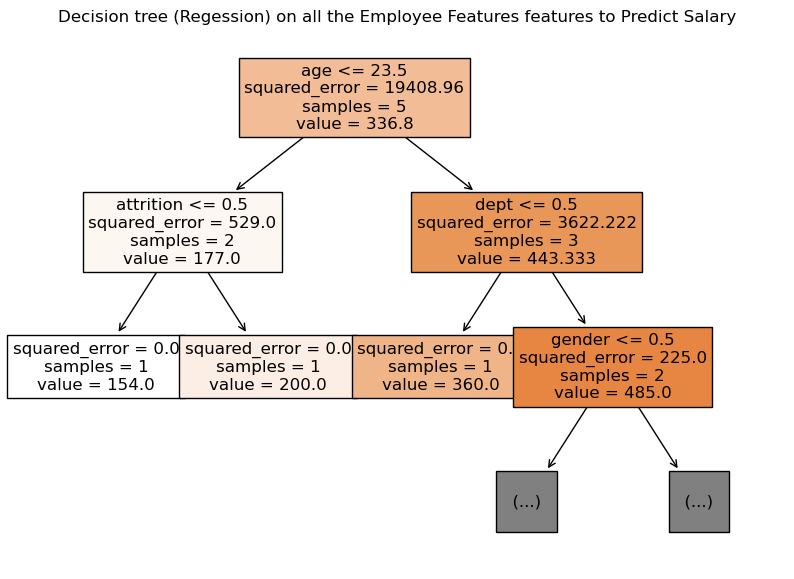

In [109]:
plt.figure(figsize=(10,7))
plot_tree(regDT, filled=True, feature_names=['age', 'dept', 'gender', 'attrition'], fontsize=12, max_depth=2)
plt.title("Decision tree (Regession) on all the Employee Features features to Predict Salary")
plt.show();
#keep changing value of max_dept to see the effect on tree

In [97]:
newData2 = pd.DataFrame({'age':[24, 25], 'dept':[2,1], 'gender':[0,1], 'attrition':[0,0]})
newData2

,age,dept,gender,attrition
0,24,2,0,0
1,25,1,1,0


In [ ]:
regDT.predict(newData2)
#predict Salary of these persons

# End here
-   use large data
-   encode
-   train, test, validation
-   random forests